In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_PATH = 'test.png'

In [4]:
image = cv2.imread(IMAGE_PATH)

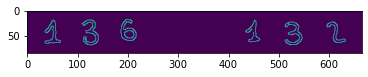

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 15)
edged = cv2.Canny(blur, 10, 500)
plt.imshow(edged)

In [6]:
reader = easyocr.Reader(['es'], gpu=False)
result = reader.readtext(edged, allowlist ='0123456789')
result

Using CPU. Note: This module is much faster with a GPU.


[([[27, 11], [153, 11], [153, 75], [27, 75]], '43', 0.9349915105576233)]

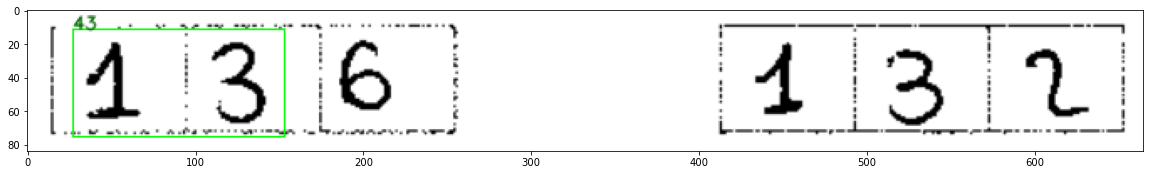

In [7]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 1)
    img = cv2.putText(img, text, top_left, font, 0.35, (0, 100, 0), 1, cv2.LINE_AA)
    
_ = plt.figure(figsize=(20, 15))
_ = plt.imshow(img)